In [29]:
# importing some required libraries
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nkony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df = pd.read_json("CETM47-23_24-AS2-Data.json")
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [31]:
# Select and print unique labels
unique_labels_df = df[['label', 'label_name']].drop_duplicates().sort_values(by='label')
print(unique_labels_df)

# Get the list of unique labels
#labels = df["label_name"].unique().tolist()
labels = unique_labels_df["label_name"].tolist()
print(labels)


     label                label_name
167      0            arts_&_culture
109      1  business_&_entrepreneurs
21       2               pop_culture
104      3                daily_life
0        4           sports_&_gaming
133      5      science_&_technology
['arts_&_culture', 'business_&_entrepreneurs', 'pop_culture', 'daily_life', 'sports_&_gaming', 'science_&_technology']


<Axes: xlabel='label', ylabel='count'>

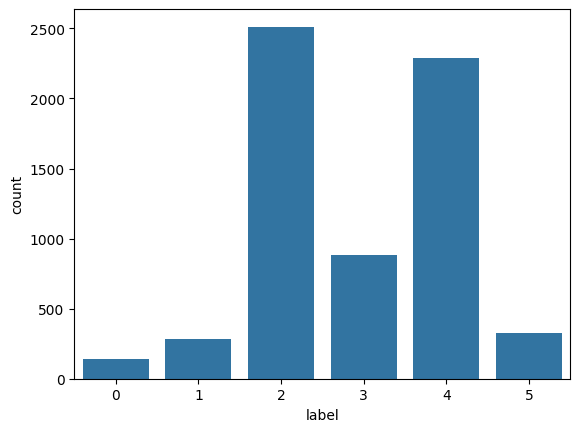

In [32]:
# plotting the data using countplot
sns.countplot(x="label",data=df)

In [33]:
# define tweet sanitizer function to clean the tweets: remove url's, punctuations, hashtags and mentions.
def sanitizeTweet(tweet):
    # removing the urls from the text
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', r"", tweet)
    #removing the numbers from the text
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
    #removing the tags from the text
    tweet = re.sub(r'(@\S+) | (#\S+)', r'', tweet)

    # Pattern to match {{something}} or {@something@}
    pattern = r'\{\{.*?\}\}|\{@.*?@\}'
    tweet = re.sub(pattern, '', tweet)
    # removing the punctuation from the text
    tweet_without_punctuation = [char for char in tweet if char not   
                                in string.punctuation]
    # converting the list to string 
    tweet_without_punctuation = "".join(tweet_without_punctuation) 
    # set of stop words 
    stop_words = set(stopwords.words("english"))
    # removing the stop words 
    tweet_without_stopwords = [word for word in  
                              tweet_without_punctuation.split()
                              if word.lower() not in stop_words]
    return tweet_without_stopwords

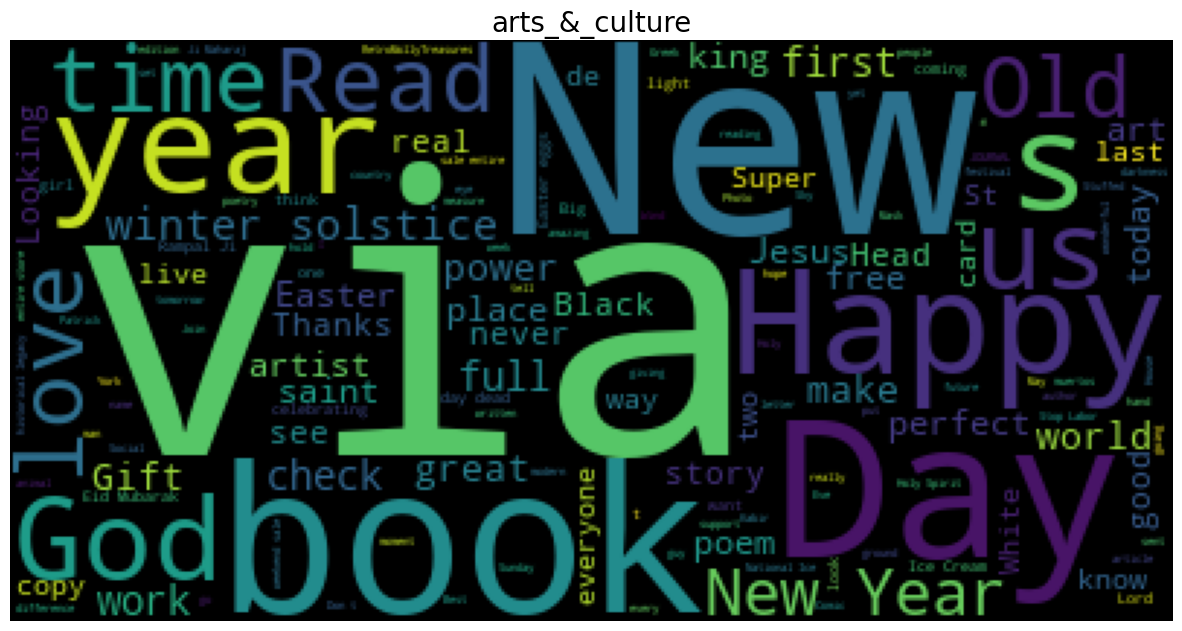

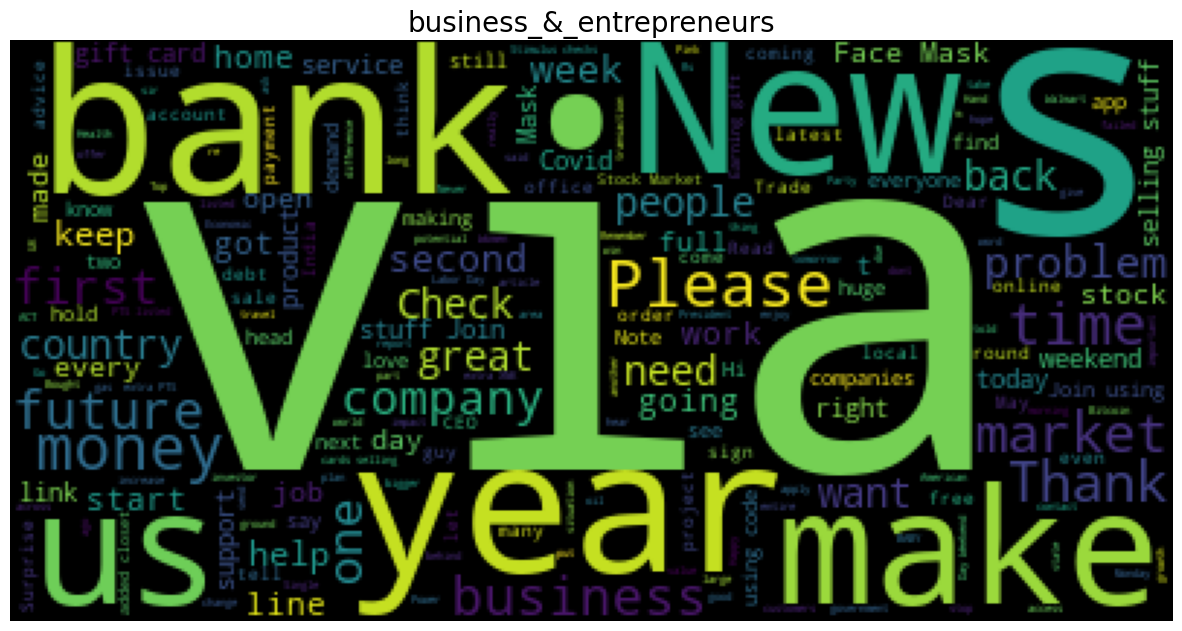

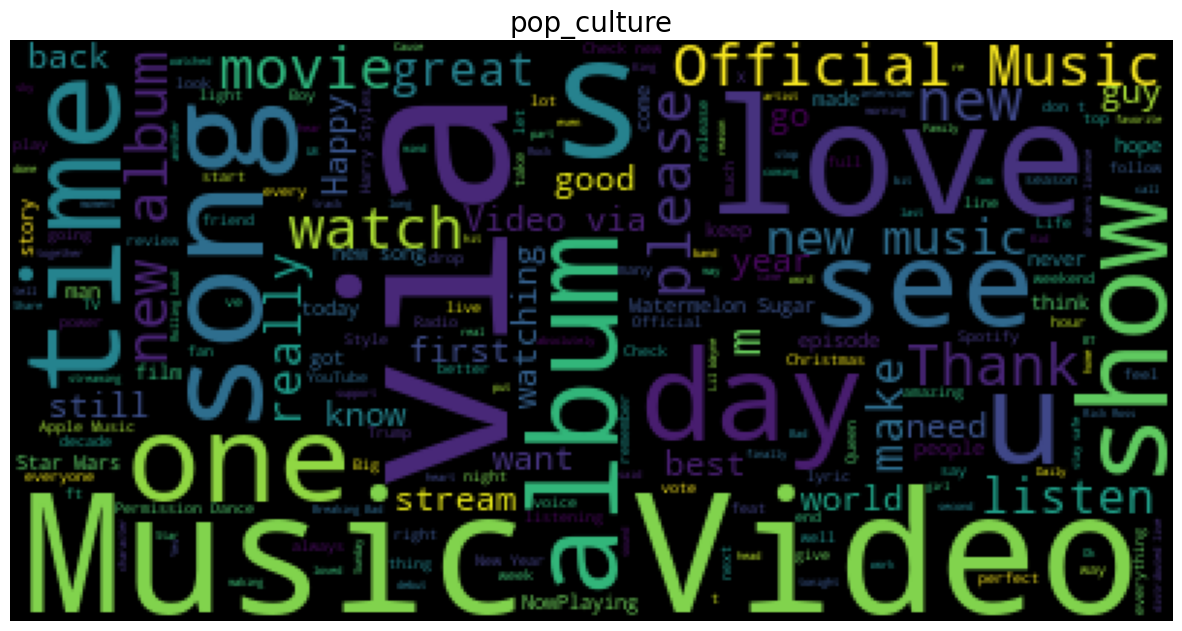

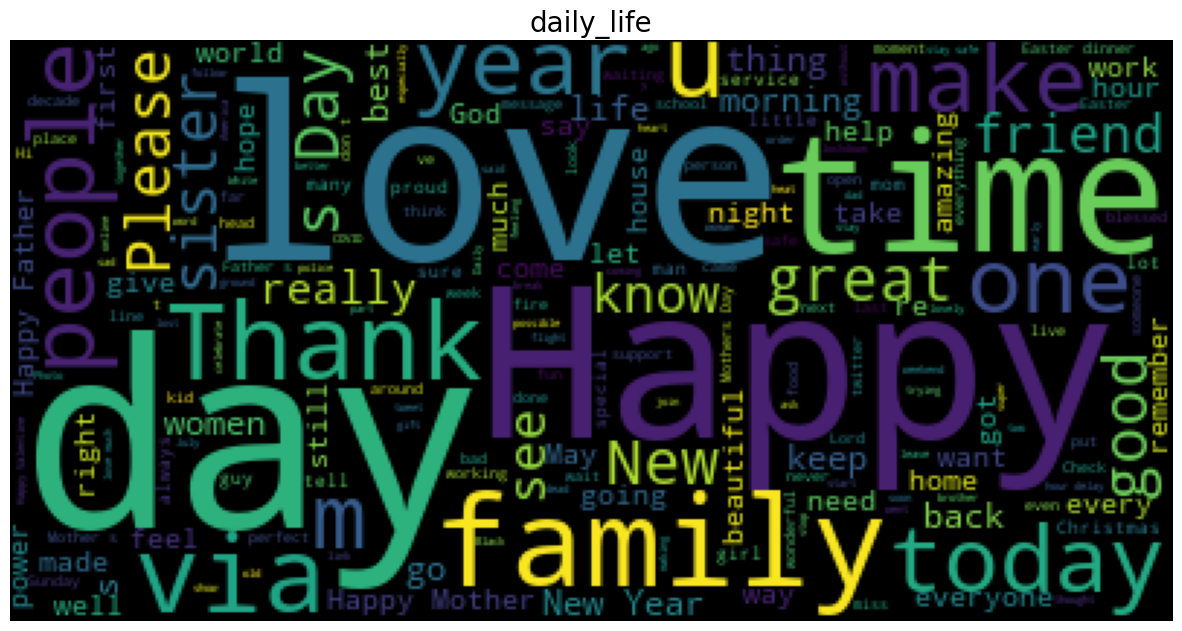

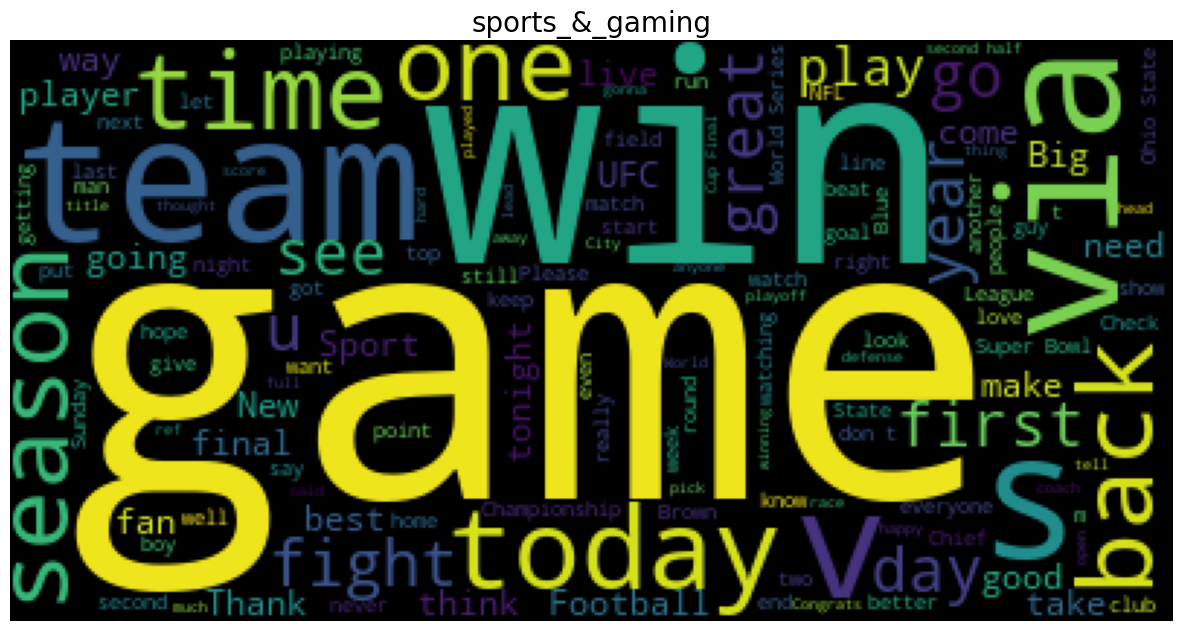

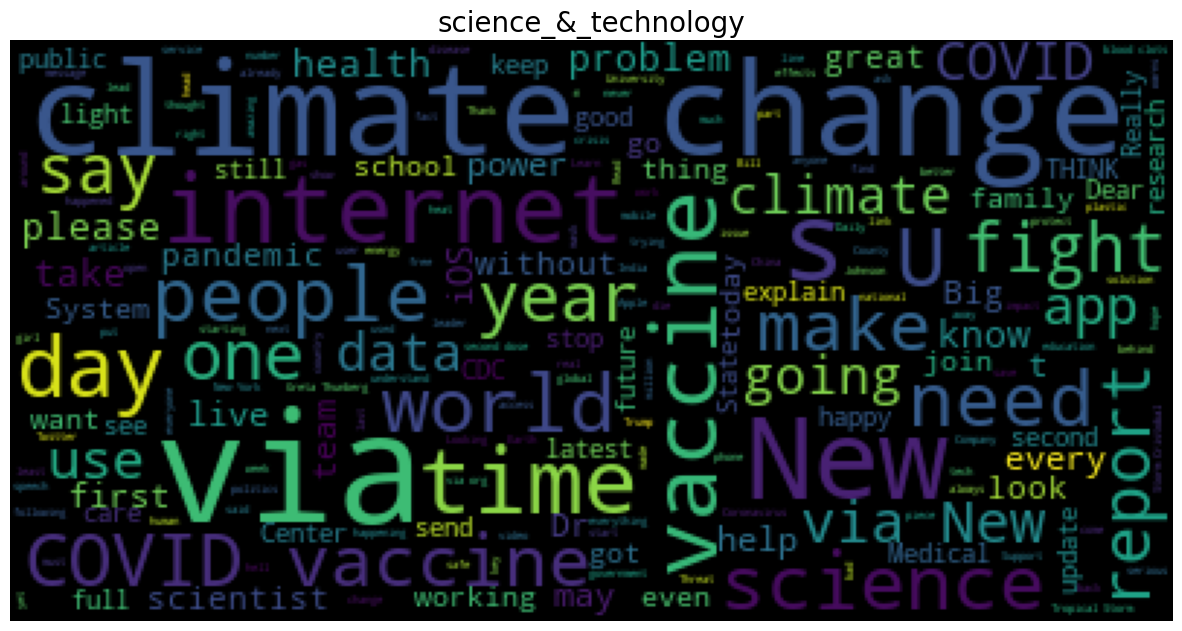

In [34]:
# plot the wordcloud for each label
for label in labels:
    label_tweets = df[df["label_name"] == label]['text'].tolist()
    cleanedTweets = []
    for tweet in label_tweets:
        cleanedTweet = sanitizeTweet(tweet)
        cleanedTweets.append(" ".join(cleanedTweet))
    label_tweets_string = " ".join(cleanedTweets)
    #print(label)
    plt.figure(figsize=(15,15))
    plt.axis("off")
    plt.title(label, fontsize=20)
    plt.imshow(WordCloud().generate(label_tweets_string))

In [ ]:
# Get all the tweet texts as a list
tweets = df['text'].tolist()

In [35]:
# Extract features using TfidfVectorizer with custom analyzer

tfidf_vectorizer = TfidfVectorizer(analyzer=sanitizeTweet)
X_tfidf = tfidf_vectorizer.fit_transform(tweets)
tfidf_features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_features_df)

             0         1    2         3    4         5    6    7    8    9  \
0     0.378447  0.128994  0.0  0.131683  0.0  0.137478  0.0  0.0  0.0  0.0   
1     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
2     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
3     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
4     0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
...        ...       ...  ...       ...  ...       ...  ...  ...  ...  ...   
6438  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
6439  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
6440  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
6441  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   
6442  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0   

      ...   ️‍  ️‍notmyrealdad  ️‍✨  ️‍❤️‍  ️‼️‼️  ️♨️   ️️    

In [41]:
# Initialize the CountVectorizer with the custom analyzer
count_vectorizer = CountVectorizer(analyzer=sanitizeTweet)
X_count = count_vectorizer.fit_transform(tweets)

# Convert the matrix to a DataFrame for better readability
count_features_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
print(count_features_df)

,0,1,2,3,4,5,6,7,8,9,...,️‍,️‍notmyrealdad,️‍✨,️‍❤️‍,️‼️‼️,️♨️,️️,？,｜,￼Morning
0,2,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Split the dataset into training and test sets
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Vectorize the tweets using TfidfVectorizer with the custom analyzer
vectorizer = TfidfVectorizer(analyzer=sanitizeTweet)
X_train_vec = vectorizer.fit_transform(X_train)  # Learn and transform the training data
X_test_vec = vectorizer.transform(X_test)  # Transform the test data based on the training data

# Build and train the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = classification_report(y_test, y_pred)
#print(f'Accuracy: {accuracy:.2f}')
print(accuracy)

# Print the predictions and actual labels
print("Predictions:", y_pred)
print("Actual labels:", y_test.values)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        60
           2       0.65      0.89      0.75       497
           3       0.95      0.10      0.18       179
           4       0.73      0.93      0.82       468
           5       0.00      0.00      0.00        60

    accuracy                           0.69      1289
   macro avg       0.39      0.32      0.29      1289
weighted avg       0.65      0.69      0.61      1289

Predictions: [2 2 2 ... 2 2 4]
Actual labels: [3 2 4 ... 4 2 2]


C:\Users\nkony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nkony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nkony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py: